In [1]:
from IPython.display import display, IFrame

# Replace 'yourfile.pdf' with the path to your PDF file
file_path = 'theory.pdf'

# Display the PDF
display(IFrame(file_path, width=800, height=600))

In [2]:
# import all the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [3]:
############### define function and solve pde #####################################################
alpha = 1

# x-axis details. It is always better to normalize the data if possible.
xlen = 1
nx = 100
dx = xlen/nx
x = np.linspace(0, xlen, nx)

# ********** time-axis details **********

# maximum value of time-step we can use using stability condition
dtmax = (dx**2)/(4*alpha)

# time-step, used in the algo
dt = .1*dtmax  

# num of time step
nt = 5000


# ********** make a vector with dimension: nt **********
def initial_u(nx=nx):
    # u = np.empty(( 1, nx))
    # uguess = .5
    # u.fill(uguess)
    u = np.random.rand(nx)  
    
    # BCs
    u[0] = -10
    u[-1] = 100
    return u
u = initial_u()

# ********** update the value of each 1D-grid-point, with time **********
def calculate(u, n1=5, n2=10, n3=50): 
    list1 = []; list2 = []; list3 = []
    for k in range(0, nt):
        for i in range(1, nx-1, 1): 
            tmp = u[i] + alpha*(dt/dx**2)*(u[i+1] + u[i-1] - 2*u[i])
            u[i] = tmp
            
            # take a snapshot for 3 gridpoints
            if i==n1:
                list1.append(u[i])
            elif i==n2:
                list2.append(u[i])
            elif i==n3:
                list3.append(u[i])
    return u, list1, list2, list3

#########################################################################################################
# initialize u
u = initial_u()

# grid points at where you want the snapshot
n1 = 3; n2 = 10; n3 = 60

# Do the calculation here (Solve PDE!)
u, list1, list2, list3 = calculate(u, n1, n2, n3)
#########################################################################################################

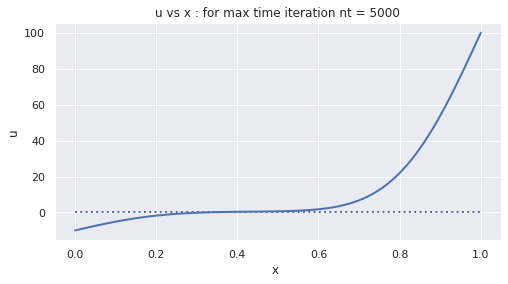

In [4]:
#########################################################################################################
sns.set()
fig = plt.figure (figsize=(8, 4))
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '2'

# plt.plot(x, u[130,:]/u.max())
plt.plot(x, u)
# plot the known solution!
# plt.plot(x, np.sin(np.pi*x))
# plt.plot(x, np.cos(2*np.pi*x))
plt.xlabel("x ")
plt.ylabel("u")
# plt.ylim(0,110)
plt.hlines(y=0.0,xmin=0,xmax=1, linestyle='dotted')
plt.title(f"u vs x : for max time iteration nt = {nt}")


### plt.savefig('scalar_pde_1D_codetest_vr3.png',facecolor="w", transparent=True, dpi=300)
plt.show()

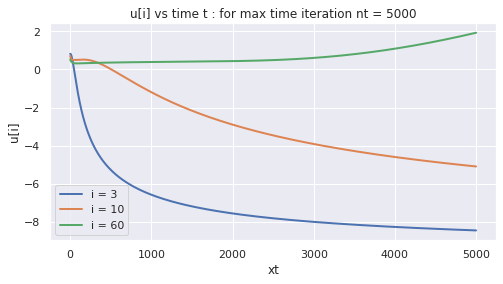

In [5]:
#########################################################################################################
sns.set()
fig = plt.figure (figsize=(8, 4))
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '2'

x = np.arange(nt)
plt.plot(x, list1, label="i = {}".format(n1))
plt.plot(x, list2, label="i = {}".format(n2))
plt.plot(x, list3, label="i = {}".format(n3))
# plot the known solution!
# plt.plot(x, np.sin(np.pi*x))
# plt.plot(x, np.cos(2*np.pi*x))
plt.xlabel("xt")
plt.ylabel("u[i]")
# plt.ylim(0,110)
plt.hlines(y=0.0,xmin=0,xmax=1, linestyle='dotted')
plt.title(f"u[i] vs time t : for max time iteration nt = {nt}")


### plt.savefig('scalar_pde_1D_codetest_vr3.png',facecolor="w", transparent=True, dpi=300)
plt.legend()  # Show the legend
plt.show()

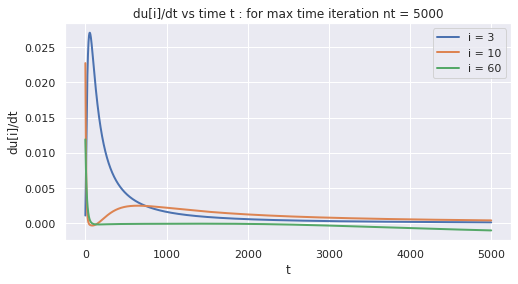

In [6]:
#########################################################################################################
sns.set()
fig = plt.figure (figsize=(8, 4))
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '2'

tmp_vec1 = np.array(list1)
diff_vec1 = tmp_vec1[:-1]-tmp_vec1[1:]

tmp_vec2 = np.array(list2)
diff_vec2 = tmp_vec2[:-1]-tmp_vec2[1:]

tmp_vec3 = np.array(list3)
diff_vec3 = tmp_vec3[:-1]-tmp_vec3[1:]

x = np.arange(nt-1)
plt.plot(x, diff_vec1, label="i = {}".format(n1))
plt.plot(x, diff_vec2, label="i = {}".format(n2))
plt.plot(x, diff_vec3, label="i = {}".format(n3))
# plot the known solution!
# plt.plot(x, np.sin(np.pi*x))
# plt.plot(x, np.cos(2*np.pi*x))
plt.xlabel("t")
plt.ylabel("du[i]/dt")
# plt.ylim(0,110)
plt.hlines(y=0.0,xmin=0,xmax=1, linestyle='dotted')
plt.title(f"du[i]/dt vs time t : for max time iteration nt = {nt}")


### plt.savefig('scalar_pde_1D_codetest_vr3.png',facecolor="w", transparent=True, dpi=300)
plt.legend()  # Show the legend
plt.show()